# Apprentissage supervisé

Machine learning = Modèle à partir de données issues de l'expérience
3 techniques
1. apprentissage supervisé
1. Apprentissage non supervisé
1. Apprentissage par renforcement

## Supervisé
Les données sont caractérisées par des features $x_i$ (variables: hauteur, largeur...)

Les données sont annotées par un label/target y (une autre variable : une pomme, une poire...)

L'objectif : prédire y en fonction des $x_i$ qu'on va lui donner

1. On commence par alimenter la machine en données 
1. C'est un dataset
1. On spécifie le type de modèle à utiliser : linéaire, polynomial, arbre, réseau de neurones
1. On précise aussi les paramètres du modèle (hyperparamètreq)
1. Phase d'entrainement : Le soft utilise un algo d'optimisation pour déterminer les valeurs des paramètres du modèle
1. On peut alors utiliser le modèle pour faire des prédictions

Avec l'apprentissage supervisé on peut résoudre des problèmes : 
1. de régression avec des valeurs de y continues (1.8, 42...)
1. de classification avec des valeurs de y qui sont discètes (pomme, poire, spam...)

## scikit-learn
* Les algos de machine learning sont déjà dans scikit-learn
* Ont tous la même architecture

Pour faire un modèle
1. On instancie un estimateur et on lui passe les hyperparamètres
1. Ensuite on entraine, évalue et utilise le modèle avec toujours les 3 mêmes méthodes

```python
model = LinearRegression()
model.fit(X, y)       # entraiement
model.score(X, y)     # évaluation
model.predict(X, y)   # utilisation


model = DecisionTreeClassifier()
model.fit(X, y)
model.score(X, y)
model.predict(X, y)
```

X et y sont 2 tableaux numpy. Ils ont 2 dimensions :
* X : [n_samples, n_features]
* y : [n_samples, n_target=1]
 
Les modèles sont dans le user guide : https://scikit-learn.org/stable/user_guide.html#user-guide

Il faut importer les modules correspondant et **PAS** sklearn

```python
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
```


![Alt text](sklearn.png)

## Régression

In [24]:
import numpy as np
import matplotlib.pyplot as plt


In [25]:
np.random.seed(0)
m = 100                                  # 100 samples
X = np.linspace(0, 10, m).reshape(m, 1)  # 2 dim
y = X + np.random.randn(m, 1)            # 2 dim 

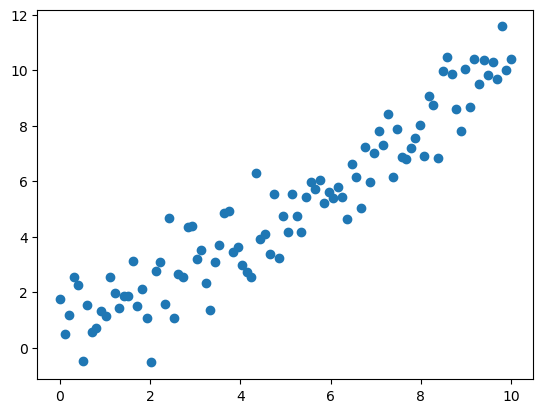

In [26]:
fig, ax = plt.subplots()
_ = ax.scatter(X, y)

On va utiliser un modèle de régression linéaire. Donc importer le bon module.


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression() # pas de paramètres, moindre carré, lire la doc
model.fit(X, y)            # https://scikit-learn.org/stable/modules/linear_model.html
model.score(X, y)

0.8881140743377214

Ici 88% c'est le coef de détermination ($R^2$)

In [29]:
model.predict(X)

array([[0.20847145],
       [0.30647825],
       [0.40448505],
       [0.50249185],
       [0.60049865],
       [0.69850544],
       [0.79651224],
       [0.89451904],
       [0.99252584],
       [1.09053264],
       [1.18853944],
       [1.28654624],
       [1.38455304],
       [1.48255984],
       [1.58056664],
       [1.67857344],
       [1.77658024],
       [1.87458704],
       [1.97259384],
       [2.07060064],
       [2.16860743],
       [2.26661423],
       [2.36462103],
       [2.46262783],
       [2.56063463],
       [2.65864143],
       [2.75664823],
       [2.85465503],
       [2.95266183],
       [3.05066863],
       [3.14867543],
       [3.24668223],
       [3.34468903],
       [3.44269583],
       [3.54070263],
       [3.63870942],
       [3.73671622],
       [3.83472302],
       [3.93272982],
       [4.03073662],
       [4.12874342],
       [4.22675022],
       [4.32475702],
       [4.42276382],
       [4.52077062],
       [4.61877742],
       [4.71678422],
       [4.814

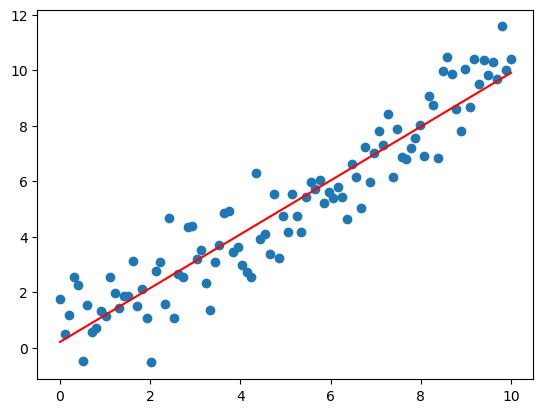

In [30]:
predictions = model.predict(X)
fig, ax = plt.subplots()
_ = ax.scatter(X, y)
_ = ax.plot(X, predictions, c='r')

Si les données d'entrées ne sont plus lineaires ça marche plus.
Faut choisir un autre modèle.

In [31]:
y = X*X + np.random.randn(m, 1)            # 2 dim 

c:\Users\phili\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


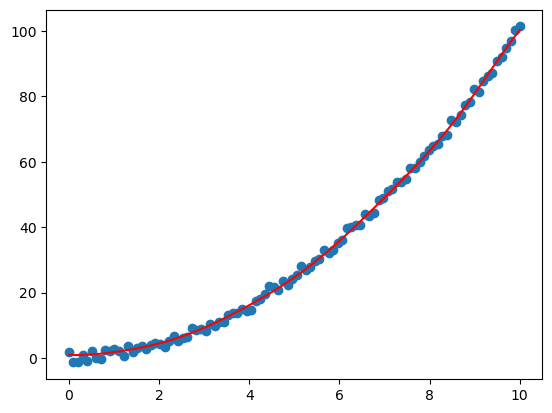

In [32]:
from sklearn.svm import SVR
model = SVR(C=100) 
model.fit(X, y)       
model.score(X, y)
predictions = model.predict(X)
fig, ax = plt.subplots()
_ = ax.scatter(X, y)
_ = ax.plot(X, predictions, c='r')

## Classification
Classification KNN

In [33]:
import pandas as pd
import seaborn as sns

In [34]:
titanic = sns.load_dataset("titanic")
titanic.shape
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
titanic = titanic[["survived", "pclass", "sex", "age"]]
titanic.dropna(axis=0, inplace=True)
titanic["sex"].replace(["male", "female"], [0,1], inplace=True)
titanic.head()
                  

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


Objectif : développer un modèle de classification pour déterminer qui va survivre ou non.

Utiliser la carte

Choisir KNeighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
model = KNeighborsClassifier()

Faut entrainer le modèle sur des données. On a pas de données X et y. On a juste un dataframe Pandas. Va falloir couper le tableau.

In [38]:
y = titanic["survived"]
X = titanic.drop("survived", axis=1)

X et y sont des Dataframes, donc ce sont des tableaux numpy utilisables avec sklearn.

In [55]:
X.head()

,pclass,sex,age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [42]:
model.fit(X, y)
model.score(X, y)

0.8417366946778712

In [43]:
model.predict(X) # on passe au modèle les passagers qu'il a utilisé pour paramétrer le modèle
                 # 1 = survécu
                 # 0 = mort

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [52]:
def survie(model, pclass=3, sex=0, age=26):
  x  = np.array([pclass, sex, age]).reshape(1, 3) # ATTENTION l'ordre est important et il faut 2 dim
  print(model.predict(x))
  print(model.predict_proba(x)) # affiche la proba d'appartenir à la classe de ceux qui vont mourrir
                                # et la proba d'appartenir à la classe de ceux qui vont survivre
                                # permet de comprendre la décision

In [54]:
survie(model)
survie(model, age=59, pclass=2)



[0]
[[0.8 0.2]]
[0]
[[1. 0.]]


c:\Users\phili\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\phili\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\phili\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\phili\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Exo
Ecrire une routine pour choisir le meilleur paramètre à passer à 

In [57]:
from sklearn.neighbors import KNeighborsClassifier

y = titanic["survived"]
X = titanic.drop("survived", axis=1)

score = 0.0
for n in range(1, 11):
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X, y)
  score = model.score(X, y)
  print(f"{n} -> {score:.3f}")


  

1 -> 0.874
2 -> 0.846
3 -> 0.863
4 -> 0.840
5 -> 0.842
6 -> 0.822
7 -> 0.821
8 -> 0.794
9 -> 0.810
10 -> 0.803
